In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ukbb = pd.read_csv('/gpfs/commons/home/tlin/output/prs/PRSCS/36k/bellenguez_rerun_0909/snp_count.txt', sep = ' ', header = None, names=['count_ukbb','chr'])
adsp = pd.read_csv('/gpfs/commons/home/tlin/output/prs/PRSCS/36k_adsp_ld_panel/bellenguez/snp_count.txt', sep = ' ', header = None, names=['count_adsp','chr'])

In [35]:
ukbb

,count_ukbb,chr
0,80091,bellenguez_pst_eff_a1_b0.5_phi1e-02_chr1.txt
1,51490,bellenguez_pst_eff_a1_b0.5_phi1e-02_chr10.txt
2,49088,bellenguez_pst_eff_a1_b0.5_phi1e-02_chr11.txt
3,47847,bellenguez_pst_eff_a1_b0.5_phi1e-02_chr12.txt
4,36672,bellenguez_pst_eff_a1_b0.5_phi1e-02_chr13.txt
5,31824,bellenguez_pst_eff_a1_b0.5_phi1e-02_chr14.txt
6,28578,bellenguez_pst_eff_a1_b0.5_phi1e-02_chr15.txt
7,28124,bellenguez_pst_eff_a1_b0.5_phi1e-02_chr16.txt
8,25677,bellenguez_pst_eff_a1_b0.5_phi1e-02_chr17.txt
9,28495,bellenguez_pst_eff_a1_b0.5_phi1e-02_chr18.txt


In [9]:
ukbb.chr = ukbb.chr.str.replace('bellenguez_pst_eff_a1_b0.5_phi1e-02_chr','').str.replace('.txt','')
adsp.chr = adsp.chr.str.replace('bellenguez_pst_eff_a1_b0.5_phi1e-02_chr','').str.replace('.txt','')

,count_ukbb,chr,count_adsp
0,80091,1,526530
1,51490,10,346316
2,49088,11,335082
3,47847,12,323457
4,36672,13,252462
5,31824,14,221609
6,28578,15,188767
7,28124,16,197541
8,25677,17,176202
9,28495,18,193899


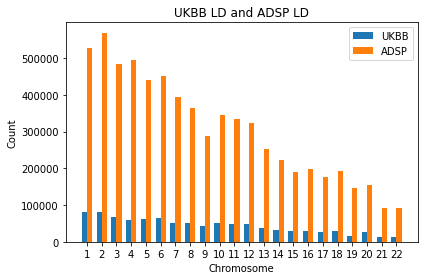

In [30]:
snp_count = pd.merge(ukbb, adsp, on = 'chr')
snp_count.drop(index=22, inplace=True) ## drop the total snp count
snp_count['chr'] = snp_count['chr'].astype(int)
snp_count = snp_count.sort_values('chr')

chr_labels = snp_count['chr']
ukbb_heights = snp_count['count_ukbb']
adsp_heights = snp_count['count_adsp']
# Bar width
bar_width = 0.35

fig, ax = plt.subplots()

# Plot bars for UKBB
bars1 = ax.bar(np.arange(22), snp_count['count_ukbb'], bar_width, label='UKBB')

# Plot bars for ADSP (shifted by bar_width to the right)
bars2 = ax.bar(np.arange(22) + bar_width, snp_count['count_adsp'], bar_width, label='ADSP')

# Add labels and title
ax.set_xlabel('Chromosome')
ax.set_ylabel('Count')
ax.set_title('UKBB LD and ADSP LD')
ax.set_xticks(np.arange(22) + bar_width / 2)
ax.set_xticklabels(chr_labels)

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()